# Analysis of FreeSurfer data
The following notebook will analyze the metrics received from volume measurements in FreeSurfer.

### Imports

In [1]:
import pandas as pd
import numpy as np
import glob, sys, os, json, utils
import matplotlib.pyplot as plt

In [8]:
def plot_histogram(X, x_label, y_label, title, label):
    '''
    Plots histogram of a feature
    '''
    plt.hist(X, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

def get_data(csvFileName: str, ROI: []):
    '''
    The following function will sanitize data and build a numpy array with X ROI's volumes and y being the class [NC, PD]
    @csvFileName: input volumes csv
    @ROI: regions of interests desired
    '''
    df = pd.read_csv(csvFileName)
    df = utils.remove_unwanted_columns(df, ROI)
    df = utils.combine_left_right_vol(df)
        
    cols = list(df.columns.values)
    cols.pop(cols.index("subjectId"))
    df = df[["subjectId"]+cols]
    
    return df

In [9]:
ROI = [
    "subjectId", "stage",
    "Left-Putamen", "Right-Putamen", 
    "Right-Caudate", "Left-Caudate", 
    "Right-Thalamus-Proper", "Left-Thalamus-Proper", 
    "Left-Pallidum", "Right-Pallidum", 
    "Left-Cerebellum-White-Matter", "Right-Cerebellum-White-Matter", 
    "Left-Cerebellum-Cortex", "Right-Cerebellum-Cortex",
    "3rd-Ventricle", 
    "4th-Ventricle",
    "Pons",
    "SCP",
    "Midbrain",
    "Insula",
    "Precentral Cortex"
]
df = get_data("../data/volumes.csv", ROI)
df

,subjectId,Pallidum,Putamen,Caudate,Thalamus-Proper,Cerebellum-Cortex,Cerebellum-White-Matter,3rd-Ventricle,4th-Ventricle,Pons,SCP,Midbrain,Insula,Precentral Cortex,stage
0,4037,4261.3,10223.0,7586.8,17351.7,116856.4,38230.0,934.2,1330.4,19552.781704,307.724746,6989.344230,6476,14648,1.0
1,3168,3776.7,8200.9,5738.2,13200.4,91395.5,31986.1,1089.4,1339.5,14452.019213,281.394581,5453.716726,7346,14228,2.0
2,3131,4523.6,9383.2,8577.0,16020.2,118487.3,34742.2,1719.7,2169.2,21000.357958,348.730585,8004.224865,8146,13311,2.0
3,4024,3444.1,8405.3,5940.0,12945.9,93723.6,22075.2,1587.0,1690.8,13148.503931,297.837617,5969.685193,6497,9889,2.0
4,4001,4174.6,11058.9,7890.2,15731.7,126094.9,29284.0,1650.6,2085.8,16901.777054,262.838901,7330.256842,7613,13757,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3753,3443.9,9007.8,6511.1,14335.3,103145.8,25126.6,1366.5,1974.1,14799.960134,241.183927,5918.611366,6285,13786,2.0
147,3372,4797.0,10114.8,9268.2,15093.5,112521.2,36136.9,3301.4,3167.2,17399.059361,318.438874,6918.687371,7682,15109,1.0
148,3589,3067.4,7619.4,6386.1,13104.2,92495.3,29665.6,1319.4,1262.7,14052.641567,283.262188,5467.899590,5476,10508,2.0
149,3586,3709.8,8082.5,5973.9,13831.9,109396.4,29020.2,1464.9,1306.0,16415.510277,342.644554,6638.502535,6423,12962,1.0


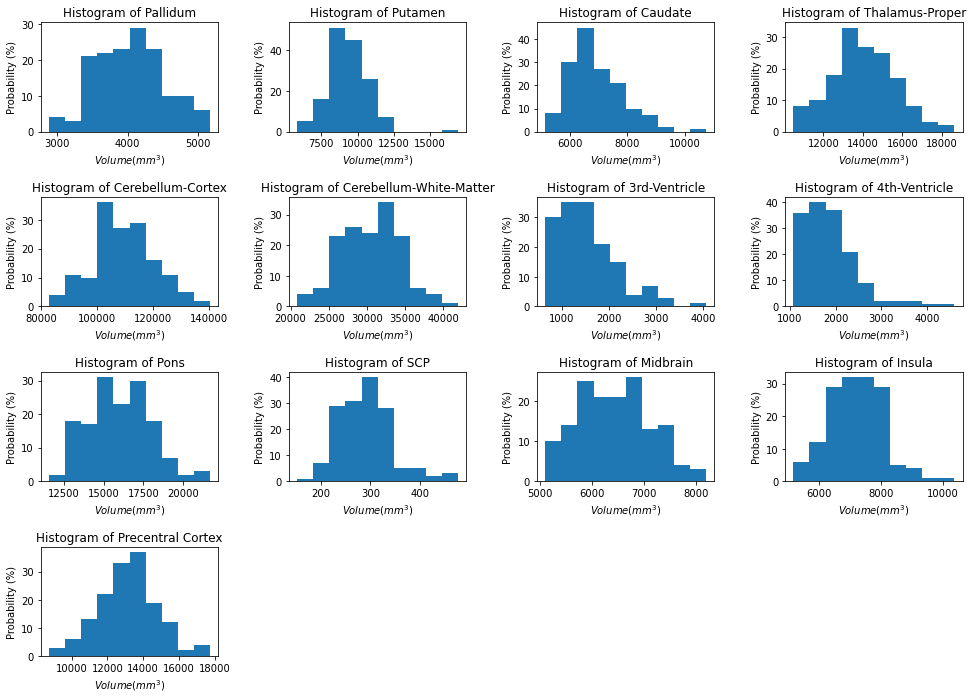

In [16]:
plt.figure(figsize=(16, 8)) 
index = 1
for column in df.columns[1:-1]:
    data = df[column].to_list()
    plt.subplot(4,4,index)
    plot_histogram(data, "$Volume (mm^{3}$)", "Probability (%)", f"Histogram of {column}", df.columns.to_list())
    index+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.6)